# The Understand data science for machine learning learning path
https://learn.microsoft.com/en-us/training/paths/understand-machine-learning/

## MOD 2: Build classical machine learning models with supervised learning
https://learn.microsoft.com/en-us/training/modules/introduction-to-classical-machine-learning/

### Supervised Learning


the only difference between supervised and unsupervised learning is how the objective function works.

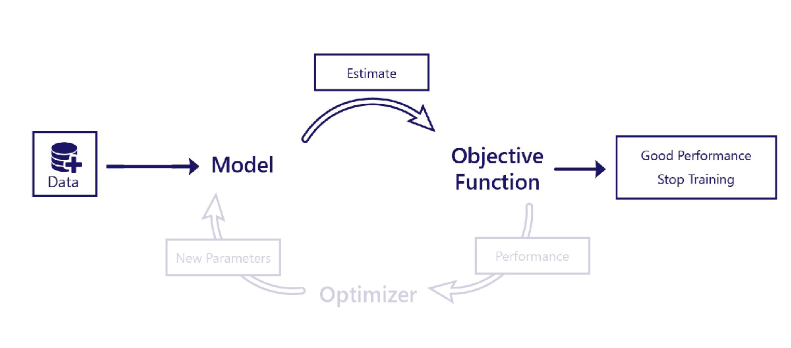

What is supervised learning?<br>
Think of supervised learning as learning by example. In supervised learning, we assess the model's performance by comparing its estimates to the correct answer. Although we can have simple objective functions, we need both:

Features that are provided as inputs to the model<br>
Labels, which are the correct answers that we want the model to be able to produce<br>

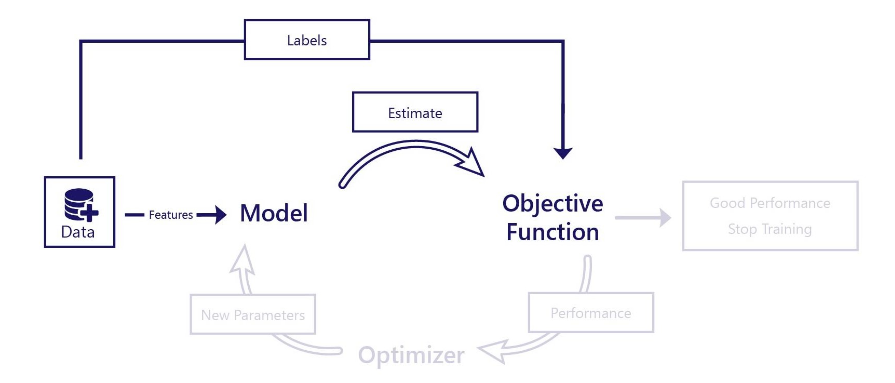


For example, consider our desire to predict what the temperature will be on January 31 of a given year. For this prediction, we'll need data with two components:

Feature: Date<br>
Label: Daily temperature (for example, from historical records)<br>
In the scenario, we provide the date feature to the model. The model predicts the temperature, and we compare this result to the dataset's "correct" temperature. The objective function can then calculate how well the model worked, and we can make adjustments to the model.

Labels are only for learning<br>
It's important to remember that no matter how models are trained, they only process features. During supervised learning, the objective function is the only component that relies on access to labels. After training, we don't need labels to use our model.

### Exercise - Implement supervised learning
https://learn.microsoft.com/en-us/training/modules/introduction-to-classical-machine-learning/3-exercise-separate-data-test-model

#### Four components

##### 1. The data

In [2]:
import pandas
import wget
wget.download('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/m0b_optimizer.py')
wget.download('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv')


'seattleWeather_1948-2017 (1).csv'

In [ ]:
# Load a file that contains weather data for Seattle
data = pandas.read_csv('seattleWeather_1948-2017.csv', parse_dates=['date'])



# Print the first and last few rows
# Remember that with Jupyter notebooks, the last line of 
# code is automatically printed

data.head()


,date,amount_of_precipitation,max_temperature,min_temperature,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [ ]:
# check data types
data.dtypes


date                       datetime64[ns]
amount_of_precipitation           float64
max_temperature                     int64
min_temperature                     int64
rain                               object
dtype: object

In [ ]:
# keep only Jan temp
data = data[[d.month == 1 for d in data.date]].copy()
data.head()


,date,amount_of_precipitation,max_temperature,min_temperature,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [ ]:
data.shape


(2170, 5)

We have data from 1948 to 2017, split across 2,170 rows.

We'll analyze the relationship between date and daily minimum temperatures. Let's take a quick look at our data as a graph.

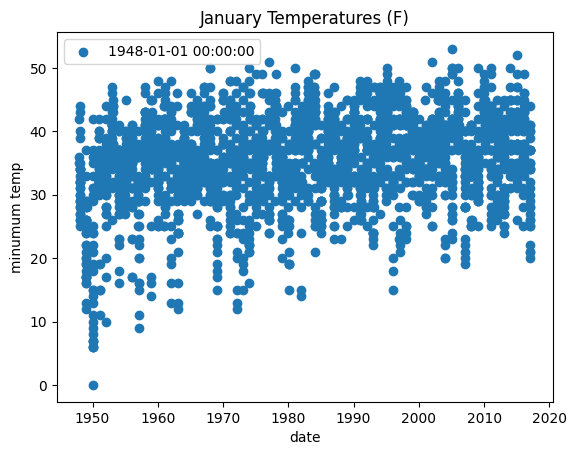

In [12]:
import matplotlib.pyplot as plt

# lets take a quick look at our data

plt.scatter(data['date'], data['min_temperature'])

# add labels and legends
plt.xlabel('date')
plt.ylabel('minumum temp')
plt.title('January Temperatures (F)')
plt.legend(data['date']) 


Machine learning usually works best when the X and Y axes have roughly the same range of values. We'll cover why in later learning material. For now, let's just scale our data slightly.

In [ ]:
import numpy as np

# This block of code scales and offsets the data slightly, which helps the training process
# You don't need to understand this code. We'll cover these concepts in later learning material

# Offset date into number of years since 1982
data["years_since_1982"] = [(d.year + d.timetuple().tm_yday / 365.25) - 1982 for d in data.date]

# Scale and offset temperature so that it has a smaller range of values
data["normalised_temperature"] = (data["min_temperature"] - np.mean(data["min_temperature"])) / np.std(data["min_temperature"])

data.head()


,date,amount_of_precipitation,max_temperature,min_temperature,rain,years_since_1982,normalised_temperature
0,1948-01-01,0.47,51,42,True,-33.997262,0.922981
1,1948-01-02,0.59,45,36,True,-33.994524,0.107536
2,1948-01-03,0.42,45,35,True,-33.991786,-0.028371
3,1948-01-04,0.31,45,34,True,-33.989049,-0.164279
4,1948-01-05,0.17,45,32,True,-33.986311,-0.436094


C:\Users\223753\AppData\Local\Temp\ipykernel_26588\2969789251.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


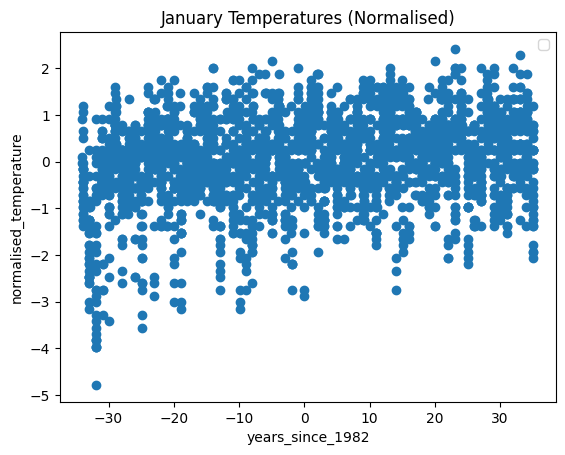

In [ ]:
# Graph
plt.scatter(data["years_since_1982"], data["normalised_temperature"])
# add labels and legend
plt.xlabel("years_since_1982")
plt.ylabel("normalised_temperature")
plt.title("January Temperatures (Normalised)")
plt.legend()


##### 2. The model

We'll select a simple linear-regression model. This model uses a line to make estimates. You might have come across trendlines like these before when making graphs.

In [17]:
class MyModel:
    def __init__(self):
        '''
        Create a new My Model
        '''
        # Straight lines described by two parameters:
        # The slope is the angle of the line
        self.slope = 0
        # The intercept moves the line up or down
        self.intercept = 0
    
    def predict(self, date):
        '''
        Estimate the temperature from date
        '''
        return date * self.slope + self.intercept

# Create our model ready to be trained
model = MyModel()

print('Model made!')


Model made!


We wouldn't normally use a model before it's been trained, but for the sake of learning, let's take a quick look at it.

Before training, our model (the red line) isn't useful at all. It always simply predicts zero.

Model parameters before training: 0, 0
Model visualised before training:


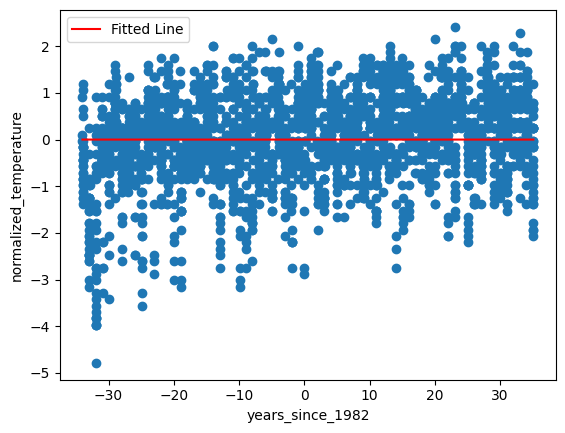

In [ ]:
print(f"Model parameters before training: {model.intercept}, {model.slope}")

# Look at how well the model does before training
print("Model visualised before training:")

plt.scatter(data['years_since_1982'], data['normalised_temperature'])
plt.plot(data['years_since_1982'], model.predict(data['years_since_1982']), 'r', label= 'Fitted Line' )

# add labels and legend
plt.xlabel('years_since_1982')
plt.ylabel('normalized_temperature')
plt.legend()


##### 3. The Cost (objective) function
These functions in supervised learning compare the model's estimate to the correct answer. In our case, our label is temperature, so our cost function compares the estimated temperature to temperatures seen in the historical records.

In [ ]:
def cost_function(actual_temperatures, estimated_temperatures):
    '''
    Calculates the difference between actual and estimated temperatures
    Returns the difference, and also returns the squared difference (the cost)

    actual_temperatures: One or more temperatures recorded in the past
    estimated_temperatures: Corresponding temperature(s) estimated by the model
    '''

    # Calculate the difference between actual temperatures and those
    # estimated by the model
    difference = estimated_temperatures - actual_temperatures

    # Convert to a single number that tells us how well the model did
    # (smaller numbers are better)
    cost = sum(difference ** 2)

    return difference, cost


##### 4. The Optimizer
The optimizer's role is to guess new parameter values for the model.

We haven't covered optimizers in detail yet, so to make things simple, we'll use an prewritten optimizer. You don't need to understand how this works, but if you're curious, you can find it in our GitHub repository.

In [ ]:
from m0b_optimizer import MyOptimizer

# Create an optimizer
optimizer = MyOptimizer()


##### The Training Loop
Let's put these components together so that they train the model.

First, let's make a function that performs one iteration of training. Read each step carefully in the following code. Add some print() statements inside the method to help see the training in action.

In [ ]:
def train_one_iteration(model_inputs, true_temperatures, last_cost:float):
    '''
    Runs a single iteration of training.


    model_inputs: One or more dates to provide the model (dates)
    true_temperatues: Corresponding temperatures known to occur on those dates

    Returns:
        A Boolean, as to whether training should continue
        The cost calculated (small numbers are better)
    '''
    # === USE THE MODEL ===
    # Estimate temperatures for all data that we have
    estimated_temperatures = model.predict(model_inputs)

    # === OBJECTIVE FUNCTION ===
    # Calculate how well the model is working
    # Smaller numbers are better 
    difference, cost = cost_function(true_temperatures, estimated_temperatures)

    # Decide whether to keep training
    # We'll stop if the training is no longer improving the model effectively
    if cost >= last_cost:
        # Stop training
        return False, cost
    else:
        # === OPTIMIZER ===
        # Calculate updates to parameters
        intercept_update, slope_update = optimizer.get_parameter_updates(model_inputs, cost, difference)

        # Change the model parameters
        model.slope += slope_update
        model.intercept += intercept_update

        return True, cost

print("Training method ready")


Training method ready


Let's run a few iterations manually, to watch how training works.

Run the following code several times and note how the model changes.

In [ ]:
import math

print(f"Model parameters before training:\t\t{model.intercept:.8f},\t{model.slope:.8f}")

continue_loop, cost = train_one_iteration(model_inputs = data["years_since_1982"],
                                                    true_temperatures = data["normalised_temperature"],
                                                    last_cost = math.inf)

print(f"Model parameters after 1 iteration of training:\t{model.intercept:.8f},\t{model.slope:.8f}")


Model parameters before training:		-0.00022171,	0.01192491
Model parameters after 1 iteration of training:	-0.00023466,	0.01192493


It'll take thousands of iterations to train the model well, so let's wrap it in a loop.

Training beginning...
Iteration: 0
Iteration: 400
Iteration: 800
Iteration: 1200
Iteration: 1600
Iteration: 2000
Iteration: 2400
Iteration: 2800
Iteration: 3200
Iteration: 3600
Iteration: 4000
Training complete!
Model parameters after training:	-0.00648846,	0.01193327


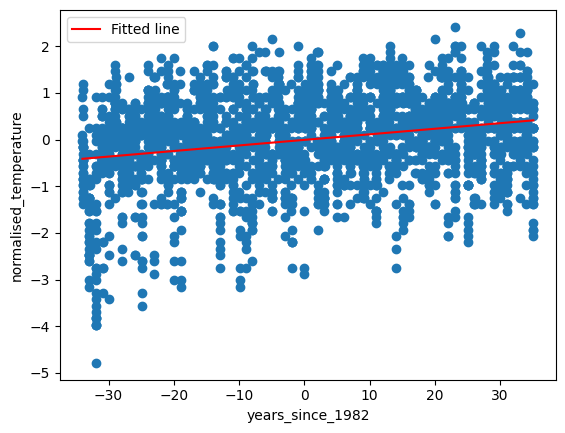

In [ ]:
# Start the loop
print("Training beginning...")
last_cost = math.inf
i = 0
continue_loop = True
while continue_loop:

    # Run one iteration of training
    # This will tell us whether to stop training, and also what
    # the cost was for this iteration
    continue_loop, last_cost = train_one_iteration(model_inputs = data["years_since_1982"],
                                                    true_temperatures = data["normalised_temperature"],
                                                    last_cost = last_cost)
   
    # Print the status
    if i % 400 == 0:
        print("Iteration:", i)

    i += 1

    
print("Training complete!")
print(f"Model parameters after training:\t{model.intercept:.8f},\t{model.slope:.8f}")

plt.scatter(data["years_since_1982"], data["normalised_temperature"])
plt.plot(data["years_since_1982"], model.predict(data["years_since_1982"]), 'r', label='Fitted line')
                              
# add labels and legend
plt.xlabel("years_since_1982")
plt.ylabel("normalised_temperature")
plt.legend()  


Notice how now that the model is trained, it's giving more sensible predictions about January temperatures.

Interestingly, the model shows temperatures going up over time. Perhaps we need to stop feeding grain to our elk earlier in the year!

##### Summary
In this exercise, we split up supervised learning into its individual stages to see what's going on in code when we use third-party libraries. The important point to take away is how these pieces fit together. Note that most parts of this process require data.


### Minimize model errors with cost functions
https://learn.microsoft.com/en-us/training/modules/introduction-to-classical-machine-learning/4-minimize-error-cost-functions

### Exercise - Optimize a model by using cost functions
### Exercise: Supervised learning by using different cost functions

In this exercise, we'll take a deeper look at how cost functions can change:

* How well models appear to have fit data
* The kinds of relationships a model represents

#### Loading the data

Let's start by loading the data. To make this exercise simpler, we'll use only a few datapoints this time.

In [47]:
import pandas
# wget.download('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/microsoft_custom_linear_regressor.py')
# !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv
from datetime import datetime

# Load a file that contains our weather data
dataset = pandas.read_csv('seattleWeather_1948-2017.csv', parse_dates=['date'])

# Convert the dates into numbers so we can use them in our models
# We make a year column that can contain fractions. For example,
# 1948.5 is halfway through the year 1948
dataset["year"] = [(d.year + d.timetuple().tm_yday / 365.25) for d in dataset.date]


# For the sake of this exercise, let's look at February 1 for the following years:
desired_dates = [
    datetime(1950,2,1),
    datetime(1960,2,1),
    datetime(1970,2,1),
    datetime(1980,2,1),
    datetime(1990,2,1),
    datetime(2000,2,1),
    datetime(2010,2,1),
    datetime(2017,2,1),
]

dataset = dataset[dataset.date.isin(desired_dates)].copy()

# Print the dataset
dataset


,date,amount_of_precipitation,max_temperature,min_temperature,rain,year
762,1950-02-01,0.00,27,1,False,1950.087611
4414,1960-02-01,0.15,52,44,True,1960.087611
8067,1970-02-01,0.00,50,42,False,1970.087611
11719,1980-02-01,0.37,54,36,True,1980.087611
15372,1990-02-01,0.08,45,37,True,1990.087611
19024,2000-02-01,1.34,49,41,True,2000.087611
22677,2010-02-01,0.08,49,40,True,2010.087611
25234,2017-02-01,0.00,43,29,False,2017.087611


#### Comparing two cost functions

Let's compare two common cost functions: the _sum of squared differences_ (SSD) and the _sum of absolute differences_ (SAD). They both calculate the difference between each predicted value and the expected value. The distinction is simply: 

* SSD squares that difference and sums the result.
* SAD converts differences into absolute differences and then sums them.

To see these cost functions in action, we need to first implement them:

In [ ]:
import numpy

def sum_of_square_differences(estimate, actual):
    # Note that with NumPy, to square each value we use **
    return numpy.sum((estimate - actual)**2)

def sum_of_absolute_differences(estimate, actual):
    return numpy.sum(numpy.abs(estimate - actual))


They're very similar. How do they behave? Let's test with some fake model estimates.

Let's say that the correct answers are `1` and `3`, but the model estimates `2` and `2`:

In [ ]:
actual_label = numpy.array([1, 3])
model_estimate = numpy.array([2, 2])

print("SSD:", sum_of_square_differences(model_estimate, actual_label))
print("SAD:", sum_of_absolute_differences(model_estimate, actual_label))


SSD: 2
SAD: 2


We have an error of `1` for each estimate, and both methods have returned the same error. 

What happens if we distribute these errors differently? Let's pretend that we estimated the first value perfectly, but were off by `2` for the second value: 

In [ ]:
actual_label = numpy.array([1, 3])
model_estimate = numpy.array([1, 1])

print("SSD:", sum_of_square_differences(model_estimate, actual_label))
print("SAD:", sum_of_absolute_differences(model_estimate, actual_label))


SSD: 4
SAD: 2


SAD has calculated the same cost as before, because the average error is still the same (`1 + 1 = 0 + 2`). According to SAD, the first and second set of estimates were equally good. 

By contrast, SSD has given a higher (worse) cost for the second set of estimates ( $1^2 + 1^2 < 0^2 + 2^2 $ ). When we use SSD, we encourage models to be both accurate and consistent in their accuracy.


#### Differences in action

Let's compare how our two cost functions affect model fitting.

First, fit a model by using the SSD cost function:

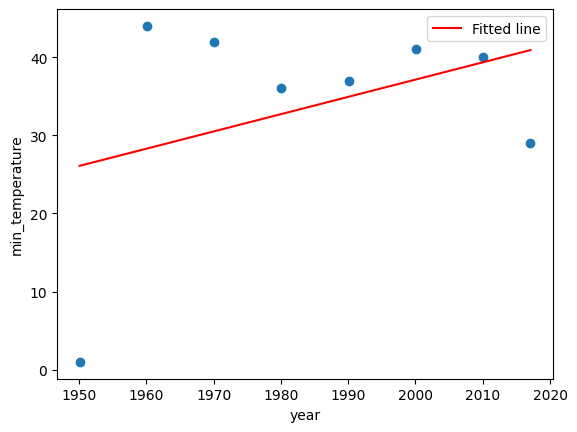

In [ ]:
from microsoft_custom_linear_regressor import MicrosoftCustomLinearRegressor
import matplotlib.pyplot as plt

# Create and fit the model
# We use a custom object that we've hidden from this notebook, because
# you don't need to understand its details. This fits a linear model
# by using a provided cost function

# Fit a model by using sum of square differences
model = MicrosoftCustomLinearRegressor().fit(X = dataset.year, 
                                             y = dataset.min_temperature, 
                                             cost_function = sum_of_square_differences)

# Graph the model
plt.scatter(dataset["year"], dataset["min_temperature"])
plt.plot(dataset["year"], model.predict(dataset["year"]), 'r', label='Fitted line')

                                                 
# add labels and legend
plt.xlabel("year")
plt.ylabel("min_temperature")
plt.legend()


Our SSD method normally does well, but here it did a poor job. The line is a far distance from the values for many years. Why? Notice that the datapoint at the lower left doesn't seem to follow the trend of the other datapoints. 1950 was a very cold winter in Seattle, and this datapoint is strongly influencing our final model (the red line). What happens if we change the cost function?

##### Sum of absolute differences

Let's repeat what we've just done, but using SAD.

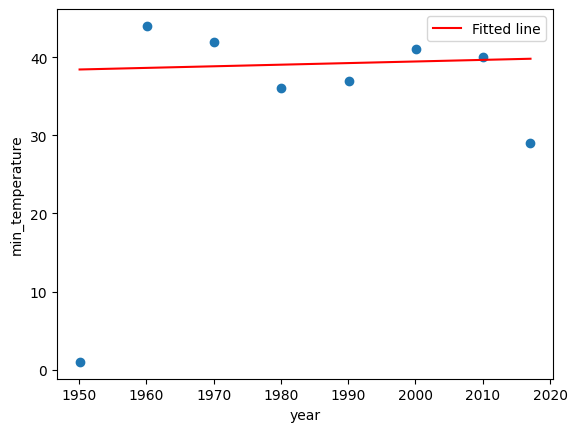

In [52]:
# Fit a model with SAD
# Fit a model by using sum of absolute differences
model = MicrosoftCustomLinearRegressor().fit(X = dataset.year, 
                                             y = dataset.min_temperature, 
                                             cost_function = sum_of_absolute_differences)

# Graph the model
plt.scatter(dataset["year"], dataset["min_temperature"])
plt.plot(dataset["year"], model.predict(dataset["year"]), 'r', label='Fitted line')

                                                 
# add labels and legend
plt.xlabel("year")
plt.ylabel("min_temperature")
plt.legend()


It's clear that this line passes through the majority of points much better than before, at the expense of almost ignoring the measurement taken in 1950. 

In our farming scenario, we're interested in how average temperatures are changing over time. We don't have much interest in 1950 specifically, so for us, this is a better result. In other situations, of course, we might consider this result worse.


#### Summary

In this exercise, you learned about how changing the cost function that's used during fitting can result in different final results. 

You also learned how this behavior happens because these cost functions describe the "best" way to fit a model; although from a data analyst's point of view, there can be drawbacks no matter which cost function is chosen.

### Optimize models by using gradient descent
https://learn.microsoft.com/en-us/training/modules/introduction-to-classical-machine-learning/6-gradient-descent